In [1]:
# Created By Joseph Chancey
# People Analytics | Work Absenteeism

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv("../Data/MFGEmployees4.csv")

In [4]:
df.head()

,EmployeeNumber,Surname,GivenName,Gender,City,JobTitle,DepartmentName,StoreLocation,Division,Age,LengthService,AbsentHours,BusinessUnit
0,1,Gutierrez,Molly,F,Burnaby,Baker,Bakery,Burnaby,Stores,32.028816,6.018478,36.577306,Stores
1,2,Hardwick,Stephen,M,Courtenay,Baker,Bakery,Nanaimo,Stores,40.320902,5.532445,30.165072,Stores
2,3,Delgado,Chester,M,Richmond,Baker,Bakery,Richmond,Stores,48.822047,4.389973,83.807798,Stores
3,4,Simon,Irene,F,Victoria,Baker,Bakery,Victoria,Stores,44.599357,3.081736,70.020165,Stores
4,5,Delvalle,Edward,M,New Westminster,Baker,Bakery,New Westminster,Stores,35.697876,3.619091,0.000000,Stores


In [5]:
df.count()

EmployeeNumber    8336
Surname           8336
GivenName         8336
Gender            8336
City              8336
JobTitle          8336
DepartmentName    8336
StoreLocation     8336
Division          8336
Age               8336
LengthService     8336
AbsentHours       8336
BusinessUnit      8336
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8336 entries, 0 to 8335
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   EmployeeNumber  8336 non-null   int64  
 1   Surname         8336 non-null   object 
 2   GivenName       8336 non-null   object 
 3   Gender          8336 non-null   object 
 4   City            8336 non-null   object 
 5   JobTitle        8336 non-null   object 
 6   DepartmentName  8336 non-null   object 
 7   StoreLocation   8336 non-null   object 
 8   Division        8336 non-null   object 
 9   Age             8336 non-null   float64
 10  LengthService   8336 non-null   float64
 11  AbsentHours     8336 non-null   float64
 12  BusinessUnit    8336 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 846.8+ KB


In [7]:
df.describe()

,EmployeeNumber,Age,LengthService,AbsentHours
count,8336.000000,8336.000000,8336.000000,8336.000000
mean,4168.500000,42.007086,4.782910,61.283978
std,2406.540255,9.939798,2.462990,49.038365
min,1.000000,3.504743,0.012098,0.000000
25%,2084.750000,35.298748,3.575892,19.127590
50%,4168.500000,42.114924,4.600248,56.005808
75%,6252.250000,48.666943,5.623922,94.284692
max,8336.000000,77.938003,43.735239,272.530123


In [8]:
df.corr()

,EmployeeNumber,Age,LengthService,AbsentHours
EmployeeNumber,1.000000,-0.018445,-0.119631,0.007418
Age,-0.018445,1.000000,0.053104,0.830234
LengthService,-0.119631,0.053104,1.000000,-0.044202
AbsentHours,0.007418,0.830234,-0.044202,1.000000


In [9]:
df.columns

Index(['EmployeeNumber', 'Surname', 'GivenName', 'Gender', 'City', 'JobTitle',
       'DepartmentName', 'StoreLocation', 'Division', 'Age', 'LengthService',
       'AbsentHours', 'BusinessUnit'],
      dtype='object')

<AxesSubplot:title={'center':'Age vs. Absent Hours'}, xlabel='AbsentHours', ylabel='Age'>

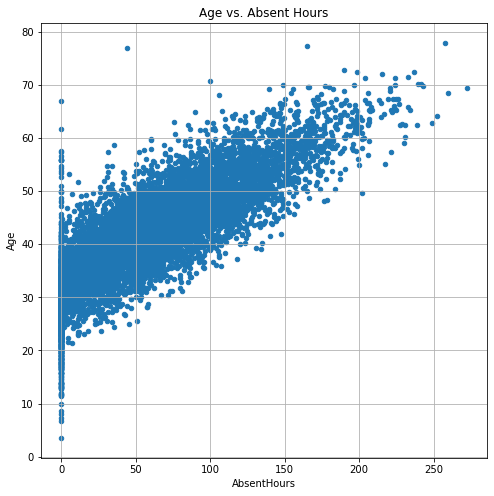

In [10]:
df.plot(kind="scatter", x="AbsentHours", y="Age", grid=True, figsize=(8,8), title="Age vs. Absent Hours")

In [11]:
# Which store has most AbsentHours
stores_df = df[["EmployeeNumber","City","JobTitle","DepartmentName",
                "StoreLocation", "Division", "Age", "LengthService", "AbsentHours"]]

average_store_absent = stores_df.groupby(['StoreLocation']).mean()

average_store_absent = average_store_absent.sort_values('AbsentHours', ascending=False)

average_store_absent

,EmployeeNumber,Age,LengthService,AbsentHours
StoreLocation,,,,
Dawson Creek,3850.666667,45.811942,3.734675,77.714385
Ocean Falls,2578.583333,45.659188,4.644798,77.197998
Valemount,4646.714286,40.818890,4.398152,70.345935
Grand Forks,4941.487805,43.800956,4.766361,69.839315
Nelson,4070.034483,41.508295,4.877998,68.136475
White Rock,4191.527778,43.447992,4.844183,67.340631
Port Coquitlam,3878.942529,42.730428,4.630489,66.901703
Terrace,4196.551020,43.160843,4.496038,65.524167
Richmond,4426.995556,42.355520,4.623862,65.303764


In [27]:
# Print statement to grab avg age for store location with most absent hours
dawson_df = df.loc[df['StoreLocation'] == "Dawson Creek"]
dawson_mean = dawson_df["Age"].mean()
print(f"The average age of an employee at the store location that has the highest amount of absent hours is: {round(dawson_mean, 2)}")

The average age of an employee at the store location that has the highest amount of absent hours is: 45.81


In [28]:
# Print statement to grab avg age for store location with least absent hours
dease_df = df.loc[df["StoreLocation"] == "Dease Lake"]
dease_mean = dease_df["Age"].mean()
print(f"The average age of an employee at the store location that has the lowest amount of absent hours is: {round(dease_mean, 2)}")

The average age of an employee at the store location that has the lowest amount of absent hours is: 41.77


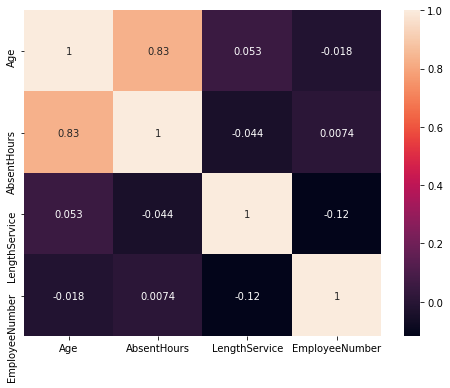

In [26]:
# Heatmap of numerical values in dataset
values_df = df[["Age", "LengthService", "AbsentHours"]]

plt.figure(figsize=(8,6))
values_df = df.corr()['Age'][:].sort_values(axis=0, ascending=False)

values_df_cols = [x for x,corr in values_df.iteritems()]
# Seaborn implementation
sns.heatmap(df[values_df_cols].corr(), annot=True)
# Save figure
plt.savefig('../Images/total_heatmap_correlation.png', bbox_inches='tight')

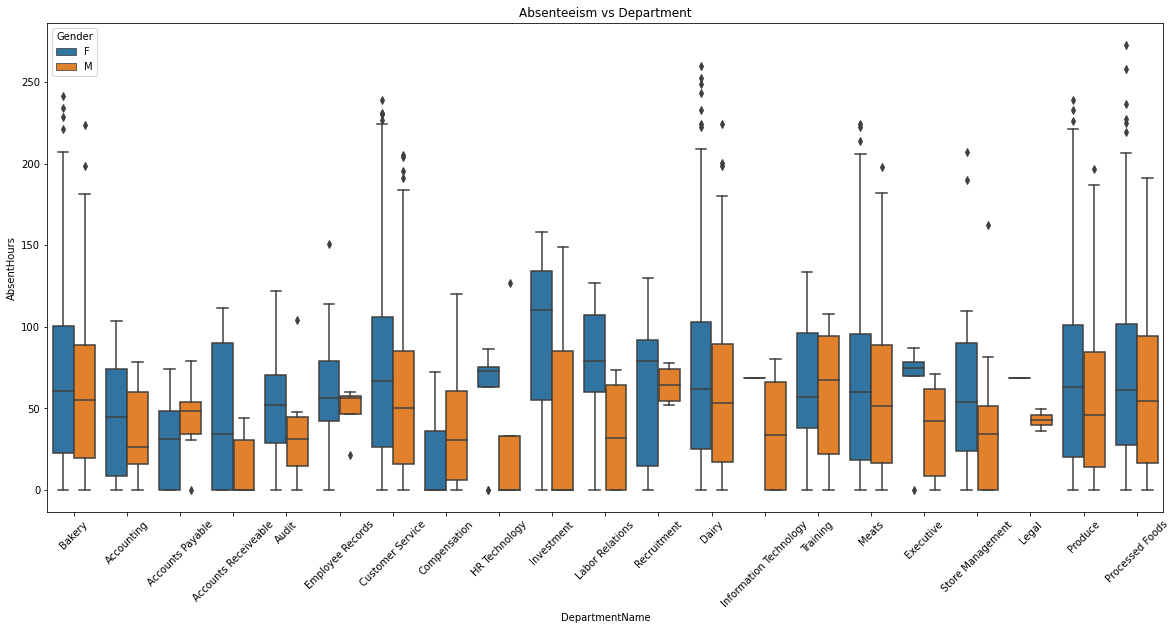

In [36]:
plt.figure(figsize=(20, 9))
sns.boxplot(x="DepartmentName", y="AbsentHours", hue="Gender", data=df)
plt.xticks(rotation = 45)
plt.title('Absenteeism vs Department')

plt.savefig('../Images/absent_department_boxplot.png', bbox_inches='tight')